In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5222136033357693907, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 24125253223
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17647524559161267179
 physical_device_desc: "device: 0, name: Quadro P6000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [10]:
inp = Input((22,))
layer_output = BatchNormalization()(inp)
layer_output = Dense(50)(layer_output)
layer_output = Dense(10)(layer_output)
layer_output = Dense(50,name='decode1)(layer_output)
layer_output = Dense(22,name='decode2')(layer_output)
encoder_model = Model(inp,layer_output)
encoder_model.compile(optimizer='adam',loss='mean_squared_error')
enc_initial_weights = encoder_model.get_weights()

def get_decoder_model_weights(encoder_model):
    inp = Input((10,))
    layer_output2 = Dense(50,name='layer1',activation='relu')(inp)
    layer_output2 = Dense(22,name='layer2')(layer_output2)
    decoder_model = Model(inp,outputs=layer_output2)
    decoder_model.compile(optimizer='adam',loss='mean_squared_error')
    decoder_model.get_layer('layer1').set_weights(encoder_model.get_layer('decode1').get_weights())
    decoder_model.get_layer('layer2').set_weights(encoder_model.get_layer('decode2').get_weights())
    return decoder_model

In [4]:
# with open('data-localize-landmarks0.pckl','rb') as file:
#     all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)    

In [11]:
train_encoded = []
test_encoded = []
decoders = []
for i in range(5):
    print("Loading file")
    with open('data-localize-landmarks'+str(i)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    model_weights = encoder_model.set_weights(enc_initial_weights)
    print("loaded")
    encoder_model.fit(np.array(all_landmarks),np.array(all_landmarks),epochs=300,
                  validation_data=(np.array(test_landmarks),np.array(test_landmarks)))
    encoder_output = Model(encoder_model.input,outputs=encoder_model.get_layer('encode').output)
    train_encoded.append(encoder_output.predict(np.array(all_landmarks)))
    test_encoded.append(encoder_output.predict(np.array(test_landmarks)))
    decoder_model = get_decoder_model_weights(encoder_model)
    decoders.append(decoder_model)

Loading file
loaded
Train on 906 samples, validate on 76 samples
Epoch 1/300
906/906 [==============================] - 1s 816us/step - loss: 61243.1273 - val_loss: 71611.3022
Epoch 2/300
906/906 [==============================] - 0s 163us/step - loss: 60056.4310 - val_loss: 68439.4712
Epoch 3/300
906/906 [==============================] - 0s 168us/step - loss: 52978.4550 - val_loss: 51015.8997
Epoch 4/300
906/906 [==============================] - 0s 149us/step - loss: 27750.5064 - val_loss: 9596.9485
Epoch 5/300
906/906 [==============================] - 0s 149us/step - loss: 7392.1361 - val_loss: 4014.7350
Epoch 6/300
906/906 [==============================] - 0s 157us/step - loss: 5878.6865 - val_loss: 3387.1786
Epoch 7/300
906/906 [==============================] - 0s 169us/step - loss: 5307.1798 - val_loss: 3238.3230
Epoch 8/300
906/906 [==============================] - 0s 157us/step - loss: 5146.5485 - val_loss: 3121.8521
Epoch 9/300
906/906 [==============================] - 0

Epoch 76/300
906/906 [==============================] - 0s 153us/step - loss: 431.1954 - val_loss: 157.9167
Epoch 77/300
906/906 [==============================] - 0s 169us/step - loss: 375.7106 - val_loss: 190.9111
Epoch 78/300
906/906 [==============================] - 0s 149us/step - loss: 369.8609 - val_loss: 241.4425
Epoch 79/300
906/906 [==============================] - 0s 147us/step - loss: 351.7247 - val_loss: 262.9647
Epoch 80/300
906/906 [==============================] - 0s 145us/step - loss: 407.8582 - val_loss: 205.3474
Epoch 81/300
906/906 [==============================] - 0s 157us/step - loss: 369.5742 - val_loss: 158.1530
Epoch 82/300
906/906 [==============================] - 0s 158us/step - loss: 351.8605 - val_loss: 188.4086
Epoch 83/300
906/906 [==============================] - 0s 167us/step - loss: 372.6032 - val_loss: 153.8028
Epoch 84/300
906/906 [==============================] - 0s 165us/step - loss: 349.3430 - val_loss: 159.4813
Epoch 85/300
906/906 [======

906/906 [==============================] - 0s 157us/step - loss: 310.1782 - val_loss: 148.9522
Epoch 152/300
906/906 [==============================] - 0s 167us/step - loss: 341.3441 - val_loss: 150.3156
Epoch 153/300
906/906 [==============================] - 0s 165us/step - loss: 292.2106 - val_loss: 141.3435
Epoch 154/300
906/906 [==============================] - 0s 152us/step - loss: 308.1089 - val_loss: 147.3369
Epoch 155/300
906/906 [==============================] - 0s 157us/step - loss: 291.9819 - val_loss: 136.9003
Epoch 156/300
906/906 [==============================] - 0s 165us/step - loss: 323.1507 - val_loss: 187.2199
Epoch 157/300
906/906 [==============================] - 0s 162us/step - loss: 339.7894 - val_loss: 148.4078
Epoch 158/300
906/906 [==============================] - 0s 178us/step - loss: 325.3824 - val_loss: 147.1178
Epoch 159/300
906/906 [==============================] - 0s 163us/step - loss: 353.7148 - val_loss: 164.9829
Epoch 160/300
906/906 [==========

906/906 [==============================] - 0s 155us/step - loss: 298.3191 - val_loss: 127.7689
Epoch 227/300
906/906 [==============================] - 0s 158us/step - loss: 303.6150 - val_loss: 127.8133
Epoch 228/300
906/906 [==============================] - 0s 158us/step - loss: 304.7771 - val_loss: 207.6426
Epoch 229/300
906/906 [==============================] - 0s 148us/step - loss: 326.0800 - val_loss: 205.3905
Epoch 230/300
906/906 [==============================] - 0s 181us/step - loss: 307.4630 - val_loss: 136.5185
Epoch 231/300
906/906 [==============================] - 0s 172us/step - loss: 286.7169 - val_loss: 142.8734
Epoch 232/300
906/906 [==============================] - 0s 163us/step - loss: 277.5852 - val_loss: 122.5907
Epoch 233/300
906/906 [==============================] - 0s 159us/step - loss: 289.0841 - val_loss: 133.1783
Epoch 234/300
906/906 [==============================] - 0s 168us/step - loss: 301.1266 - val_loss: 148.6268
Epoch 235/300
906/906 [==========

906/906 [==============================] - 0s 169us/step - loss: 61124.5012 - val_loss: 71182.2808
Epoch 2/300
906/906 [==============================] - 0s 164us/step - loss: 60962.0372 - val_loss: 70962.2076
Epoch 3/300
906/906 [==============================] - 0s 148us/step - loss: 60152.6202 - val_loss: 69029.5325
Epoch 4/300
906/906 [==============================] - 0s 148us/step - loss: 51461.7392 - val_loss: 44546.6059
Epoch 5/300
906/906 [==============================] - 0s 166us/step - loss: 15587.0811 - val_loss: 5757.8032
Epoch 6/300
906/906 [==============================] - 0s 171us/step - loss: 6100.6366 - val_loss: 3847.1207
Epoch 7/300
906/906 [==============================] - 0s 146us/step - loss: 5486.0186 - val_loss: 3531.3766
Epoch 8/300
906/906 [==============================] - 0s 197us/step - loss: 5229.3395 - val_loss: 3260.2808
Epoch 9/300
906/906 [==============================] - 0s 154us/step - loss: 4973.9320 - val_loss: 2978.9945
Epoch 10/300
906/906 [

906/906 [==============================] - 0s 177us/step - loss: 383.6984 - val_loss: 124.9764
Epoch 77/300
906/906 [==============================] - 0s 151us/step - loss: 408.6208 - val_loss: 126.2833
Epoch 78/300
906/906 [==============================] - 0s 162us/step - loss: 407.2639 - val_loss: 135.6961
Epoch 79/300
906/906 [==============================] - 0s 169us/step - loss: 393.0691 - val_loss: 128.6818
Epoch 80/300
906/906 [==============================] - 0s 148us/step - loss: 351.8172 - val_loss: 125.3557
Epoch 81/300
906/906 [==============================] - 0s 160us/step - loss: 356.9235 - val_loss: 120.3404
Epoch 82/300
906/906 [==============================] - 0s 132us/step - loss: 402.0403 - val_loss: 124.9674
Epoch 83/300
906/906 [==============================] - 0s 155us/step - loss: 380.5109 - val_loss: 131.8717
Epoch 84/300
906/906 [==============================] - 0s 189us/step - loss: 384.4029 - val_loss: 147.2340
Epoch 85/300
906/906 [===================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-f6d20db13afd>", line 11, in <module>
    validation_data=(np.array(test_landmarks),np.array(test_landmarks)))
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/keras/engine/training.py", line 1037, in fit
    validation_steps=validation_steps)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/keras/engine/training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2666, in __call__
    return self._call(inputs)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2636, in _call
    fetched = self._callable_fn(*array_vals)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/tenso

KeyboardInterrupt: 

In [31]:
cnn_base = VGG16(input_shape=(448,448,3),include_top=False,weights='imagenet')
cnn_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 448, 448, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0         
__________

In [32]:
def attention_block(x,K,labels,w,h):
    H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((K,labels))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=1))(new_shape)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
    weight = Dense(10,activation='tanh')(inter)
    return out,weight

In [8]:
K = 10
labels = 10
w,h = 3,3

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h)
final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h)

final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(10,activation='tanh')(inter)

x = Conv2D(1024, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = BatchNormalization()(x)
x = Conv2D(1024, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(10)(x)
#x = Conv2D(10, kernel_size=(1, 1), padding="same")(x)
#x = Reshape((10,),name='localization_output')(x)
final3 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([x,weight3])

bag_of_models = Add()([final1,final2,final3])


model = Model(inputs=cnn_base.input, outputs=bag_of_models)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 448, 448, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 448, 448, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 448, 448, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 224, 224, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [35]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 448, 448, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 448, 448, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 448, 448, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 224, 224, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [36]:
train_pred = []
test_pred = []

train_scores = []
test_scores = []

history_record = []

In [89]:
train_pred[3] = train_predictions
test_pred[3] = test_predictions

In [88]:
for i in range(5):     
    print("Loading file")
    if i==0 or i==1 or i==2 or i==4:
        continue
    with open('data-localize-landmarks'+str(i)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    try:
        with open('landmarks_localization_vgg16_shape_attention'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    history = model.fit(x=np.array(all_images),y=train_encoded[i],batch_size=5,epochs=2,
                           validation_data=(np.array(test_images),test_encoded[i]))
    history_record.append(history)
    train_score = model.evaluate(x=np.array(all_images),y=train_encoded[i],batch_size=50)
    test_score = model.evaluate(x=np.array(test_images),y=test_encoded[i],batch_size=50)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(all_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)
    
    try:
        with open('landmarks_localization_vgg16_shape_attention'+str(i)+'.hd5','wb') as f:
            pickle.dump(model.get_weights(),f)
    except Exception as ex:
        print("Could not write",ex)

Loading file
Loading file
Loading file
Loading file
loaded model
loaded
Train on 909 samples, validate on 75 samples
Epoch 1/2
909/909 [==============================] - 30s 32ms/step - loss: 52.1418 - acc: 0.9769 - val_loss: 209.9465 - val_acc: 0.9333
Epoch 2/2
75/75 [==============================] - 1s 19ms/step
predicting
Test Score [213.71032206217447, 0.9333333373069763]
Loading file


In [90]:
test_predds = []
for i in range(5):
    test_predds.append(decoders[i].predict(test_pred[i]))

In [52]:
test_predictions = model.predict(x=np.array(test_images),batch_size=50)

In [55]:
predictions = decoders[0].predict(test_predictions)

In [84]:
historys = []
for hist in history_record:
    historys.append(hist.history)
    
with open('vgg16-landmark-predictions-shape_attention.pckl','wb') as file:
    pickle.dump((train_pred,test_pred,historys,train_scores,test_scores),file)

In [2]:
import pickle
with open('vgg16-landmark-predictions-shape_attention.pckl','rb') as vgg16:
    train_pred,test_pred,historys,train_scores,test_scores = pickle.load(vgg16)

In [3]:
def global_localization_error(test_pred,test_landmarks):
    error = 0
    for idx in range(len(test_landmarks)):
        for set_num in range(11):
            predx,predy = test_pred[idx][2*set_num],test_pred[idx][2*set_num+1]
            x,y  = test_landmarks[idx][2*set_num],test_landmarks[idx][2*set_num+1]
            error = error + math.sqrt((predx-x)**2 + (predy-y)**2)
    return error/(len(test_landmarks)*11)

In [4]:
mean_error = []
for idx in range(5):
    with open('data-localize-landmarks'+str(idx)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    mean_error.append(global_localization_error(test_predds[idx],test_landmarks))
print(sum(mean_error)/len(mean_error))

NameError: name 'test_predds' is not defined

In [92]:
mean_error

[17.930775474051607,
 12.55040934533608,
 12.04828244162727,
 13.140067013665817,
 11.802943115013173]

In [55]:
test_pred[4].shape

(75, 10)

-4.012045


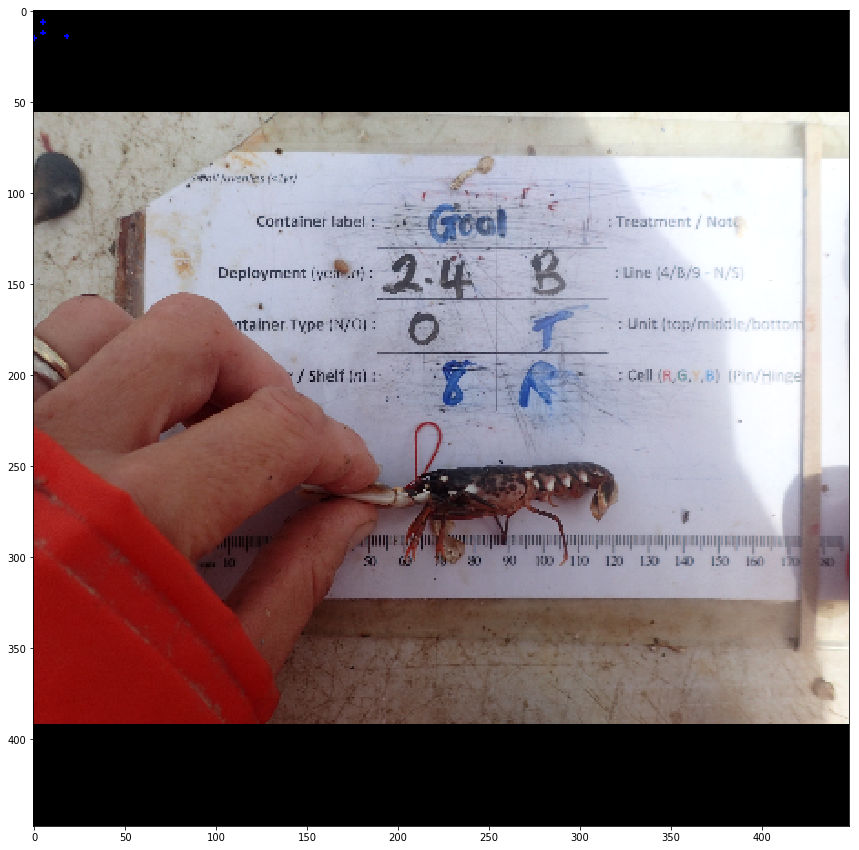

In [39]:
idx = 10
tuples = []
pred_landmarks = model.predict(np.expand_dims(np.array(test_images[idx]),0))[0]
print(pred_landmarks[0])
for i in range(11):
    tuples.append((pred_landmarks[i*2],pred_landmarks[i*2+1]))
for i in range(11):
    img = cv2.circle(test_images[idx],(int(tuples[i][0]),int(tuples[i][1])), 1, (0,0,255), -1)
pil_im = Image.fromarray(img)
plt.figure(figsize=(15,15))
plt.imshow(pil_im)

NameError: name 'history' is not defined

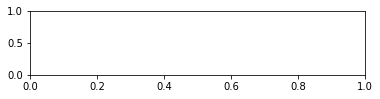

In [8]:
plt.subplot(3,1,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Total Loss')
plt.show()
plt.subplot(3,1,2)
plt.plot(history.history['localization_output_iou_metric'])
plt.xlabel('epochs')
plt.ylabel('IoU Metric')
plt.show()
plt.subplot(3,1,3)
plt.plot(history.history['classification_output_loss'])
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [18]:
from sklearn import preprocessing
import numpy
le = preprocessing.LabelEncoder()
le.classes_ = numpy.load('classes.npy')

In [22]:
idx = np.random.randint(low=0,high=np.array(test_images).shape[0])
bb,classify = model.predict(np.expand_dims(np.array(test_images)[idx],0))
[[xmin,ymin,xmax,ymax]]= bb
img = cv2.rectangle(np.array(test_images)[idx], (xmin,ymin), (xmax,ymax), (0,255,0), 4)
pil_im = Image.fromarray(img)
a = np.argmax(classify,axis=1)[0]
label = le.inverse_transform(np.argmax(classify,axis=1))
#print(label[0])
#y = ymin - 15 if ymin - 15 > 15 else ymin + 15
plt.title("Predicted: "+label[0]+", Actual: "+le.inverse_transform(np.argmax(test_predictions[idx])))
plt.imshow(pil_im)
print(label[0])

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


IndexError: list index out of range

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)!=predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)==predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, predicted_labels,labels=np.unique(labels_))
print(cm)

NameError: name 'labels_test' is not defined

In [ ]:
confusion_matrix(labels_test,predicted_labels)

labels_=list(np.unique(labels_test))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels_)
ax.set_yticklabels([''] + labels_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
idx = 101